In [140]:
import numpy as np
import pandas as pd
import seaborn as sns

In [141]:
submissions_data = pd.read_csv("data/submissions_data_train.csv")
events_data = pd.read_csv("data/event_data_train.csv")

In [142]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [143]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [144]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [145]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [169]:
events_data.user_id.unique()

array([17632, 12494,   442, ..., 22851,   943,  5198], shape=(19234,))

In [146]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [147]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [148]:
events_data['day'] = events_data.date.dt.date

In [149]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<Axes: xlabel='day'>

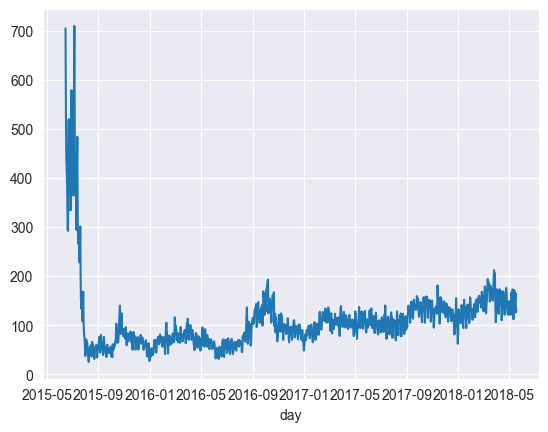

In [150]:
events_data.groupby('day').user_id.nunique().plot()

<Axes: >

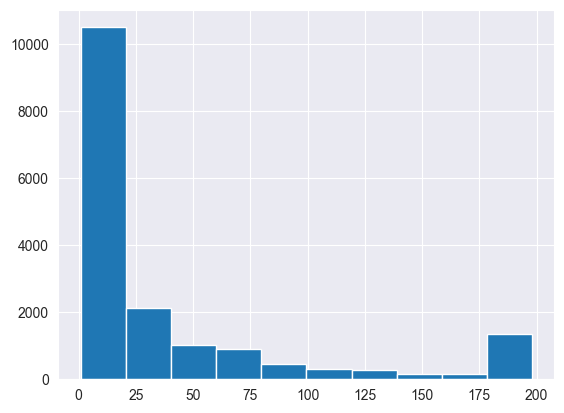

In [151]:
events_data[events_data.action == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id' : 'count'})\
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [179]:
a = events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [180]:
a.sort_values(by='viewed', ascending=False).head(10)

action,user_id,discovered,passed,started_attempt,viewed
15007,20907,163,102,0,32778
7780,10794,198,122,27,16089
18150,25279,198,122,166,9693
781,1046,128,124,721,8122
2611,3572,194,193,550,6968
8470,11770,193,118,0,6330
6879,9546,192,119,161,5915
553,761,193,118,0,4281
6043,8363,194,119,113,3492
4904,6764,193,118,0,2960


In [153]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [154]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [155]:
users_scores = submissions_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [156]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [164]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values


In [165]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

<Axes: >

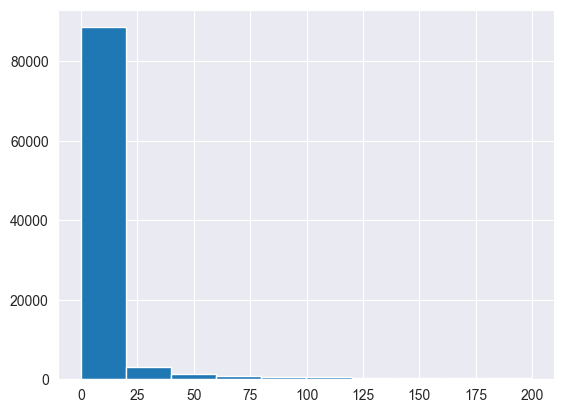

In [166]:
gap_data = gap_data / (24 * 60 * 60)
gap_data[gap_data < 200].hist()

In [168]:
gap_data.quantile(0.90)

np.float64(18.325995370370403)

In [181]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19
